# 1. Install and Import Dependencies

In [1]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Defaulting to user installation because normal site-packages is not writeable
Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html


ERROR: Could not find a version that satisfies the requirement torch==1.8.1+cu111 (from versions: 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2)
ERROR: No matching distribution found for torch==1.8.1+cu111


In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
!cd yolov5 & pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\fuyua/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-12-18 Python-3.11.4 torch-2.1.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [6]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections with Images

In [7]:
img = 'tomato.jpg'

In [8]:
results = model(img)
results.print()

image 1/1: 750x750 4 oranges
Speed: 61.2ms pre-process, 807.3ms inference, 6.9ms NMS per image at shape (1, 3, 640, 640)


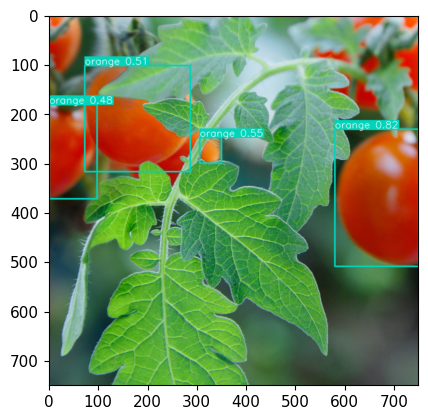

In [9]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [10]:
results.render()

[array([[[212, 127,  34],
         [218, 119,  28],
         [226, 113,  21],
         ...,
         [255, 142,  64],
         [253, 149,  78],
         [255, 156,  89]],
 
        [[235, 103,  20],
         [242,  95,  15],
         [250,  89,   8],
         ...,
         [249, 132,  55],
         [247, 138,  69],
         [249, 146,  80]],
 
        [[243, 101,  15],
         [250,  94,  11],
         [255,  89,   4],
         ...,
         [253, 131,  56],
         [252, 139,  71],
         [254, 146,  82]],
 
        ...,
 
        [[ 52,  84,  83],
         [ 49,  81,  80],
         [ 47,  79,  78],
         ...,
         [ 88, 110,  98],
         [ 90, 112, 100],
         [ 91, 113, 101]],
 
        [[ 53,  85,  84],
         [ 50,  82,  81],
         [ 48,  80,  79],
         ...,
         [ 89, 111,  99],
         [ 90, 112, 100],
         [ 91, 113, 101]],
 
        [[ 54,  86,  85],
         [ 50,  82,  81],
         [ 49,  81,  80],
         ...,
         [ 90, 112, 100],
  

# 4. Real Time Detections

In [11]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()